### 01 – BTC Data & Stylized Facts

In this notebook you will prepare BTC 5-minute data for the rest of the assignment.

Your tasks:

1. Data preparation.
2. Produce your own set of plots and statistical summaries.
5. Identify and describe the key *stylized facts* you observe in the data.

Examples of stylized facts you may look for:
- Return distribution shape
- Extreme moves or heavy tails
- Volatility behavior over time
- Any patterns in return autocorrelation or volatility persistence
- Any regime-like behaviour


Write your code and observations in below cell.



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")


In [17]:
df = pd.read_csv('C:/Users/SZK/Desktop/BTC_5m.csv')
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
df = df.set_index('datetime').sort_index()
df['returns'] = df['close'].pct_change()
df = df.dropna()

In [18]:
mu = df['returns'].mean()
std = df['returns'].std()
skewness = df['returns'].skew()
kurtosis = df['returns'].kurtosis()
extreme_threshold = 3 * std
extreme_up = len(df[df['returns'] > extreme_threshold])
extreme_down = len(df[df['returns'] < -extreme_threshold])
extreme_total = extreme_up + extreme_down
# 滚动波动率（2小时窗口）
df['volatility_2h'] = df['returns'].rolling(window=24).std() * np.sqrt(24*24)
# 波动率代理指标
df['abs_returns'] = df['returns'].abs()

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

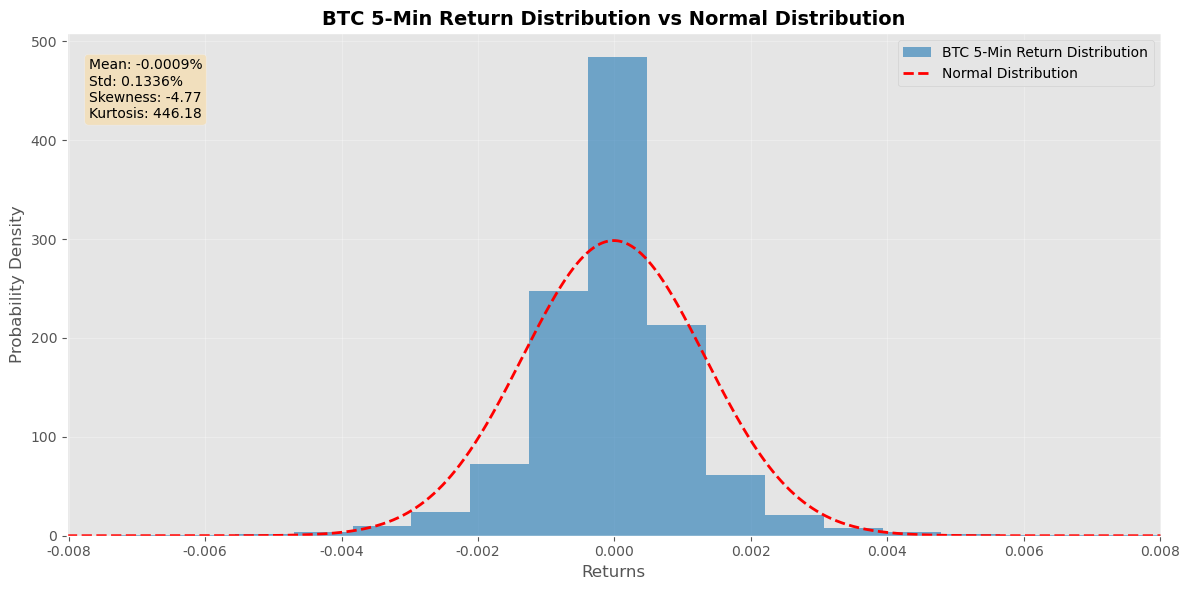

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['returns'], bins=150, density=True, alpha=0.6, color='#1f77b4', label='BTC 5-Min Return Distribution')
x_norm = np.linspace(mu - 6*std, mu + 6*std, 1000)
y_norm = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x_norm - mu)**2 / (2 * std**2))
ax.plot(x_norm, y_norm, 'r--', linewidth=2, label='Normal Distribution')

ax.text(0.02, 0.95, f'Mean: {mu*100:.4f}%\nStd: {std*100:.4f}%\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
        transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax.set_title('BTC 5-Min Return Distribution vs Normal Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Returns', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(mu - 6*std, mu + 6*std)
plt.tight_layout()
plt.savefig('btc_return_distribution.png', dpi=300, bbox_inches='tight')  
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

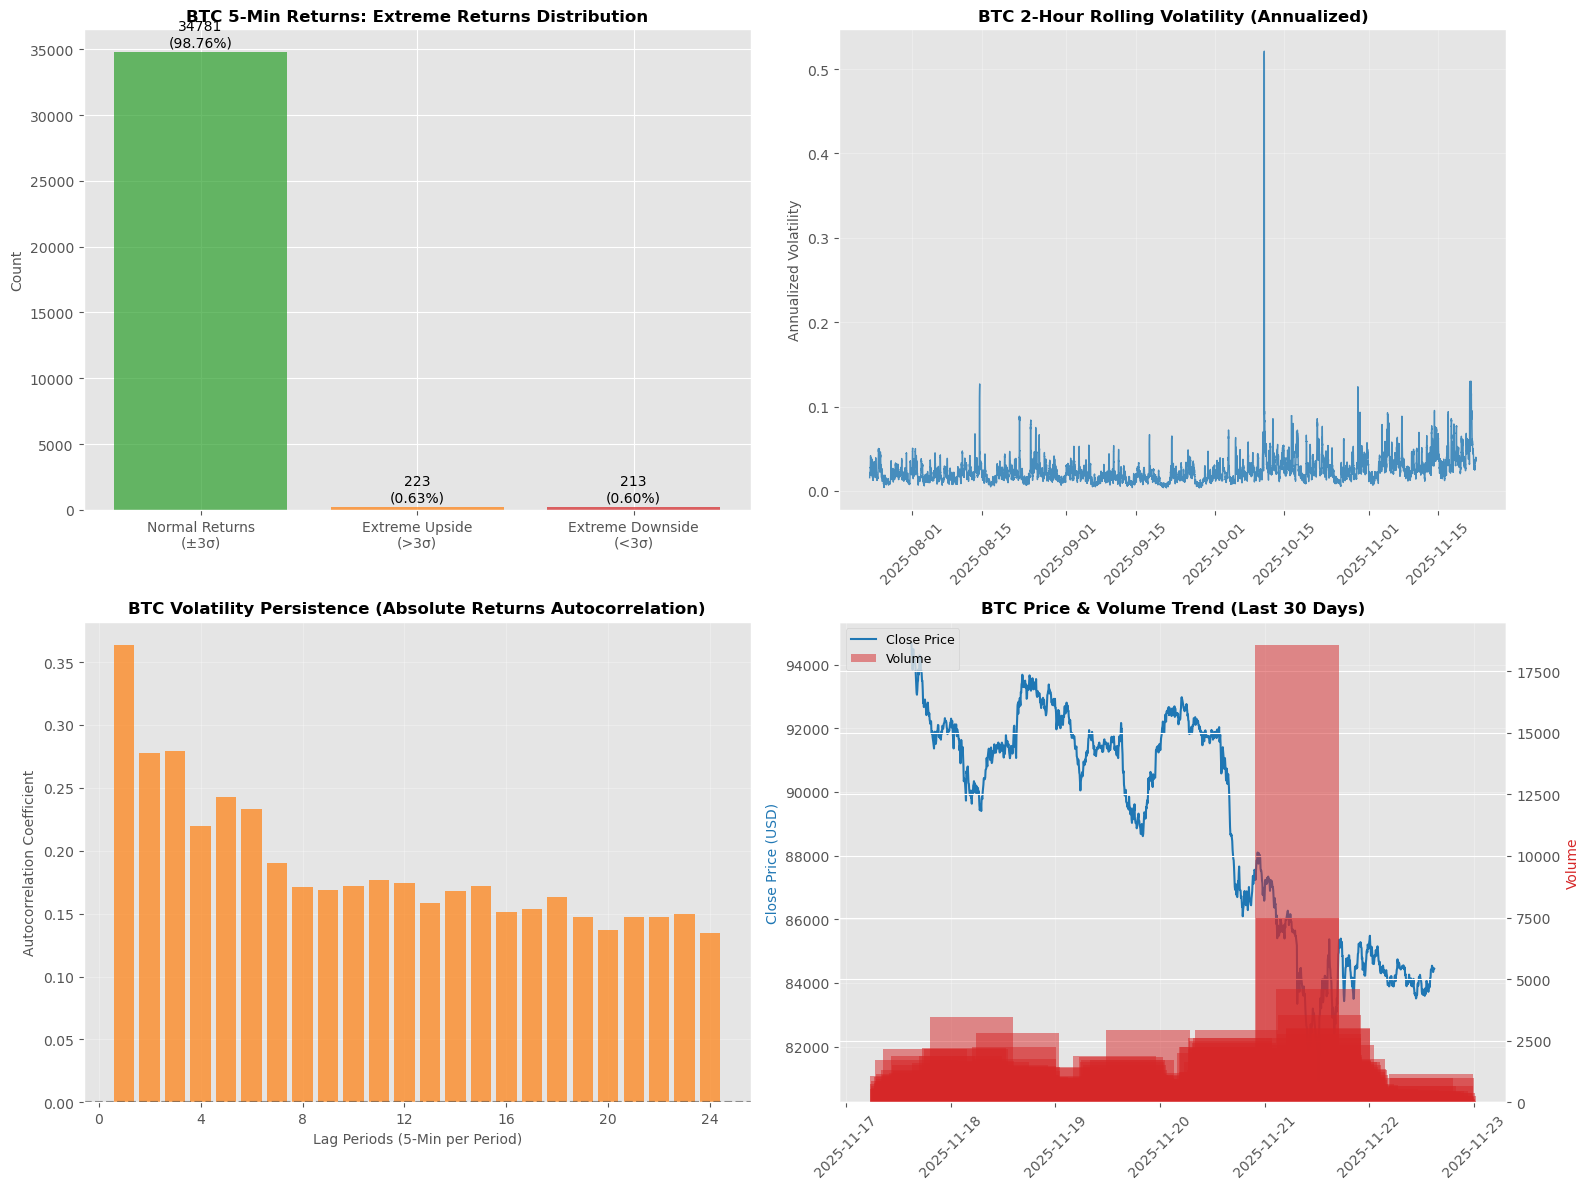

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
categories = ['Normal Returns\n(±3σ)', 'Extreme Upside\n(>3σ)', 'Extreme Downside\n(<3σ)']
counts = [len(df)-extreme_total, extreme_up, extreme_down]
colors = ['#2ca02c', '#ff7f0e', '#d62728']
axes[0,0].bar(categories, counts, color=colors, alpha=0.7)
axes[0,0].set_title('BTC 5-Min Returns: Extreme Returns Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=10)
for i, (cat, cnt) in enumerate(zip(categories, counts)):
    axes[0,0].text(i, cnt + 200, f'{cnt}\n({cnt/len(df)*100:.2f}%)', ha='center', va='bottom')


axes[0,1].plot(df.index, df['volatility_2h'], color='#1f77b4', linewidth=1, alpha=0.8)
axes[0,1].set_title('BTC 2-Hour Rolling Volatility (Annualized)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Annualized Volatility', fontsize=10)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

max_lag = 24
autocorr_values = [df['abs_returns'].autocorr(lag=lag) for lag in range(1, max_lag+1)]
axes[1,0].bar(range(1, max_lag+1), autocorr_values, color='#ff7f0e', alpha=0.7)
axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1,0].set_title('BTC Volatility Persistence (Absolute Returns Autocorrelation)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Lag Periods (5-Min per Period)', fontsize=10)
axes[1,0].set_ylabel('Autocorrelation Coefficient', fontsize=10)
axes[1,0].set_xticks(range(0, max_lag+1, 4))
axes[1,0].grid(True, alpha=0.3)

recent_data = df.tail(24*60)
ax_twin = axes[1,1].twinx()
axes[1,1].plot(recent_data.index, recent_data['close'], color='#1f77b4', linewidth=1.5, label='Close Price')
ax_twin.bar(recent_data.index, recent_data['volume'], color='#d62728', alpha=0.5, label='Volume')
axes[1,1].set_title('BTC Price & Volume Trend (Last 30 Days)', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Close Price (USD)', fontsize=10, color='#1f77b4')
ax_twin.set_ylabel('Volume', fontsize=10, color='#d62728')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)
lines1, labels1 = axes[1,1].get_legend_handles_labels()
lines2, labels2 = ax_twin.get_legend_handles_labels()
axes[1,1].legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('btc_stylized_facts_analysis.png', dpi=300, bbox_inches='tight')  
plt.show()